## Import all the libraries

In [1]:
import numpy as np
import dask
import xarray as xr
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import glob as glob
import time
from dask.diagnostics import ProgressBar
from datetime import date
import json
import os
import warnings
import seawater
import re

warnings.filterwarnings('ignore')


## Parameters

In [2]:
ymin=2010;mmin=1;dmin=1
ymax=2010;mmax=4;dmax=30
# depth of the desired comparison profile in m
depthmin=1500
# radius of the circle around the profile location in which we take the modeled profiles, in °  
radius_max=0.25
# period of time around the profile sampling date in which we take the modeled profiles, in days
period=5
# minimum amount of model profiles to be considered to make a significant statistical comparison, for instance in a 1° square and 30-days window we have 2.6 millions modeled profiles, in a 0.5°x10 days 216 000
number_of_model_profiles=100000


In [3]:
# Parameters
ymin = 2010
mmin = 1
dmin = 1
ymax = 2010
mmax = 4
dmax = 30
depthmin = 1500
radius_max = 0.25
period = 5
number_of_model_profiles = 100000


In [4]:
datemin=datetime.date(ymin,mmin,dmin)
datemax=datetime.date(ymax,mmax,dmax)
jsonfile='txt/MEDWEST60-BLBT02_'+str(datemin)+'-'+str(datemax)+'_'+str(depthmin)+'m_'+str(radius_max)+'x'+str(period)+'d_'+str(number_of_model_profiles)+'.json'

## Read the jsonfile

In [5]:
sourcefile=open(jsonfile,'rU')
infos=json.load(sourcefile)
nb_profilesEN4=len(infos)


In [6]:
vert_standart=[0,2,4,6,8,10,12,14,16,18,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,
                   110,120,130,140,150,160,170,180,190,200,220,240,260,280,300,320,340,360,380,400,
                   420,440,460,480,500,520,540,560,580,600,620,640,660,680,700,720,740,760,780,800,
                   820,840,860,880,900,920,940,960,980,1000,1050,1100,1150,1200,1250,1300,1350,1400,
                   1450,1500,1550,1600,1650,1700,1750,1800,1850,1900,1950,2000]
all_temp_mean_model=np.zeros((nb_profilesEN4,len(vert_standart)))
all_salt_mean_model=np.zeros((nb_profilesEN4,len(vert_standart)))
all_temp_en4=np.zeros((nb_profilesEN4,len(vert_standart)))
all_salt_en4=np.zeros((nb_profilesEN4,len(vert_standart)))
all_temp_percent10_model=np.zeros((nb_profilesEN4,len(vert_standart)))
all_salt_percent10_model=np.zeros((nb_profilesEN4,len(vert_standart)))
all_temp_percent90_model=np.zeros((nb_profilesEN4,len(vert_standart)))
all_salt_percent90_model=np.zeros((nb_profilesEN4,len(vert_standart)))


In [7]:
for prof in np.arange(nb_profilesEN4):
    list_profiles = infos.keys()
    reference =  str(list(list_profiles)[prof])
    print('Processing profile ', reference)
    # Open the netcdf file
    match=re.search(r'([\w.-]+).nc([\w.-]+)', reference)
    debut_ref=match.group(1)
    fin_ref=match.group(2)
    diren4="/gpfswork/rech/egi/rote001/EN4/"
    dirname=diren4+'profiles_files/MEDWEST60-BLBT02/'
    outname=dirname+str(debut_ref)+str(fin_ref)+'_MEDWEST60-BLBT02_TS.nc'
    dsprof=xr.open_dataset(outname)

    depth_en4=dsprof['depth_en4']
    temp_en4=dsprof['temp_profileEN4']
    salt_en4=dsprof['salt_profileEN4']
    mean_temp_model=dsprof['mean_temp_model']
    mean_salt_model=dsprof['mean_salt_model']
    percent10_temp_model=dsprof['percent10_temp_model']
    percent10_salt_model=dsprof['percent10_salt_model']
    percent90_temp_model=dsprof['percent90_temp_model']
    percent90_salt_model=dsprof['percent90_salt_model']
    obs_lat=dsprof['latitude_profileEN4']
    obs_lon=dsprof['longitude_profileEN4']
    obs_time=dsprof['time_profileEN4']
    
    # Project the profile to standart vertical levels
    temp_en4_standart=np.interp(vert_standart,depth_en4,temp_en4)
    salt_en4_standart=np.interp(vert_standart,depth_en4,salt_en4)
    mean_temp_model_standart=np.interp(vert_standart,depth_en4,mean_temp_model)
    mean_salt_model_standart=np.interp(vert_standart,depth_en4,mean_salt_model)
    percent10_temp_model_standart=np.interp(vert_standart,depth_en4,percent10_temp_model)
    percent10_salt_model_standart=np.interp(vert_standart,depth_en4,percent10_salt_model)
    percent90_temp_model_standart=np.interp(vert_standart,depth_en4,percent90_temp_model)
    percent90_salt_model_standart=np.interp(vert_standart,depth_en4,percent90_salt_model)

    #Fill the all profiles
    all_temp_mean_model[prof,:]=mean_temp_model_standart[:]
    all_salt_mean_model[prof,:]=mean_salt_model_standart[:]
    all_temp_en4[prof,:]=temp_en4_standart[:]
    all_salt_en4[prof,:]=salt_en4_standart[:]
    all_temp_percent10_model[prof,:]=percent10_temp_model_standart[:]
    all_salt_percent10_model[prof,:]=percent10_salt_model_standart[:]
    all_temp_percent90_model[prof,:]=percent90_temp_model_standart[:]
    all_salt_percent90_model[prof,:]=percent90_salt_model_standart[:]


Processing profile  Profile_20100106_prof.nc_71
Processing profile  Profile_20100106_prof.nc_76
Processing profile  Profile_20100113_prof.nc_69
Processing profile  Profile_20100116_prof.nc_79
Processing profile  Profile_20100131_prof.nc_83
Processing profile  Profile_20100207_prof.nc_87
Processing profile  Profile_20100215_prof.nc_74
Processing profile  Profile_20100217_prof.nc_96
Processing profile  Profile_20100219_prof.nc_96
Processing profile  Profile_20100225_prof.nc_65
Processing profile  Profile_20100225_prof.nc_73
Processing profile  Profile_20100304_prof.nc_75
Processing profile  Profile_20100307_prof.nc_69
Processing profile  Profile_20100317_prof.nc_81
Processing profile  Profile_20100322_prof.nc_60
Processing profile  Profile_20100327_prof.nc_69
Processing profile  Profile_20100329_prof.nc_91
Processing profile  Profile_20100405_prof.nc_75
Processing profile  Profile_20100406_prof.nc_68
Processing profile  Profile_20100410_prof.nc_103
Processing profile  Profile_20100416_pr

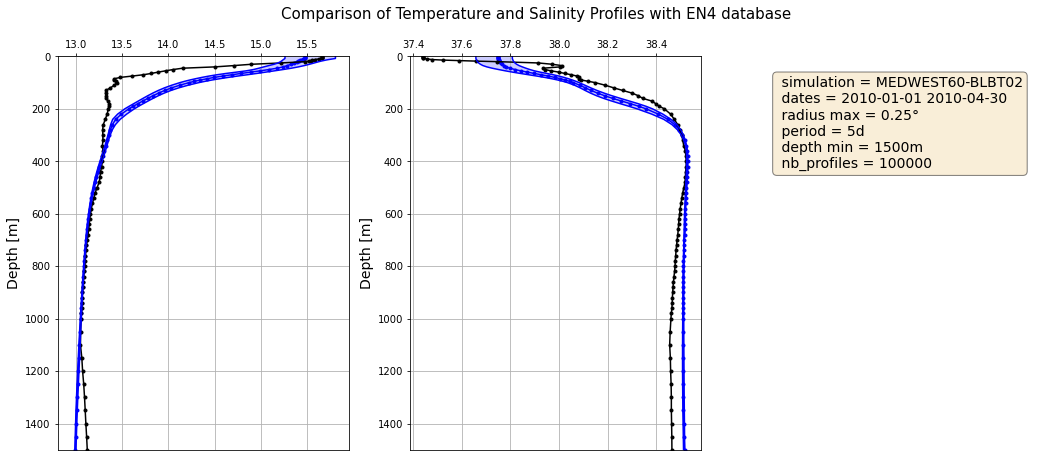

In [8]:
        fig, axs = plt.subplots(1,3, figsize=(15, 6))
        axs = axs.ravel()
        title = 'Comparison of Temperature and Salinity Profiles with EN4 database'
        plt.suptitle(title,size = 15,y=1.05)
        axs[0].plot(mean_temp_model_standart,vert_standart,'b.-', label='temp model')
        axs[0].plot(temp_en4_standart,vert_standart,'k.-', label='temp en4')
        axs[0].set_ylabel('Depth [m]', size=14)
        axs[0].set_ylim(depthmin, 0)
        axs[0].grid(True, which='both')
        axs[0].xaxis.tick_top()
        axs[0].xaxis.set_label_position('top') 
        axs[0].plot(percent10_temp_model_standart,vert_standart,'b-', label='percent10')
        axs[0].plot(percent90_temp_model_standart,vert_standart,'b-', label='percent90')
        axs[0].fill_betweenx(vert_standart, percent10_temp_model_standart, x2=percent90_temp_model_standart, alpha=0.2, facecolor='b')

        axs[1].plot(mean_salt_model_standart,vert_standart,'b.-', label='salt model')
        axs[1].plot(salt_en4_standart,vert_standart,'k.-', label='salt en4')
        axs[1].set_ylabel('Depth [m]', size=14)
        axs[1].set_ylim(depthmin, 0)
        axs[1].grid(True, which='both')
        axs[1].xaxis.tick_top()
        axs[1].xaxis.set_label_position('top') 
        axs[1].plot(percent10_salt_model_standart,vert_standart,'b-', label='percent10')
        axs[1].plot(percent90_salt_model_standart,vert_standart,'b-', label='percent90')
        axs[1].fill_betweenx(vert_standart, percent10_salt_model_standart, x2=percent90_salt_model_standart, alpha=0.2, facecolor='b')

        textstr = '\n'.join((
            ' simulation = MEDWEST60-BLBT02',
            ' dates = '+str(datemin)+' '+str(datemax),
            ' radius max = '+str(radius_max)+'°',
            ' period = '+str(period)+'d',
            ' depth min = '+str(depthmin)+'m',
            ' nb_profiles = '+str(number_of_model_profiles)))        
        props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
        axs[2].text(0.05, 0.95, textstr, transform=axs[2].transAxes, fontsize=14,verticalalignment='top', bbox=props)
        axs[2].axis('off')
        fig.tight_layout()
        plt.savefig('plots/profiles-TS-MEDWEST60-BLBT02_'+str(datemin)+'-'+str(datemax)+'_'+str(depthmin)+'m_'+str(radius_max)+'x'+str(period)+'d_'+str(number_of_model_profiles)+'.png')
